# This notebook generates figure 11 and the supplementary material related to degradation enhanced suppression

In [51]:
%pylab notebook

import warnings
warnings.filterwarnings("ignore")

import sys, os
import importlib
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

sys.path.append('lib/')
import hts_fitting as hts, hts_fitfunctions as ff, hts_misc as misc, default_figure_style as dfs, hts_beamspot as bsp
for lib in [hts, ff, misc, dfs, bsp]:
    importlib.reload(lib)

    

cols = [0, 1, 12, 13, 14, 19, 23, 25, 27, 29, 41, 52, 53, 54, 55, 56, 57, 58, 59]
names = [
    'tapeid', 
    'anneal',
    'energy', 
    'power', 
    'powerError',
    'ic0',
    'icoff',
    'noff',
    'icon',
    'non',
    'tTAR_OFF',
    'tREBCO',
    'degradation',
    'degradationError',
    'suppression', 
    'suppressionError',
    'suppression_corrected',
    'suppressionError_corrected',
    'outlier' 
]
df = pd.read_excel(dfs.master, sheet_name='data', usecols=cols, names=names, skiprows=1)

#################################
########## Filter data ##########
#################################
cut = df.tTAR_OFF < 20
cut &= (df.suppression != np.nan) & (df.suppression > 0) & (df.suppressionError > 0)
cut &= df.outlier != 1

data = df[cut]

print('\n\nTotal datapoints', data.energy.count())
for tapeid in data.tapeid.unique():
    print('\nDatapoints for', tapeid, data[data.tapeid==tapeid].energy.count())

df.columns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Total datapoints 656

Datapoints for f33 68

Datapoints for f20 11

Datapoints for f34 9

Datapoints for f29 302

Datapoints for f23 2

Datapoints for f28 58

Datapoints for f37 206


Index(['tapeid', 'anneal', 'energy', 'power', 'powerError', 'ic0', 'icoff',
       'noff', 'icon', 'non', 'tTAR_OFF', 'tREBCO', 'degradation',
       'degradationError', 'suppression', 'suppressionError',
       'suppression_corrected', 'suppressionError_corrected', 'outlier'],
      dtype='object')

## Figure11-b) description

We find an empirical relation between Ic and Tc degradation. It holds suprisingly well for all samples, except ffj20!

<IPython.core.display.Javascript object>


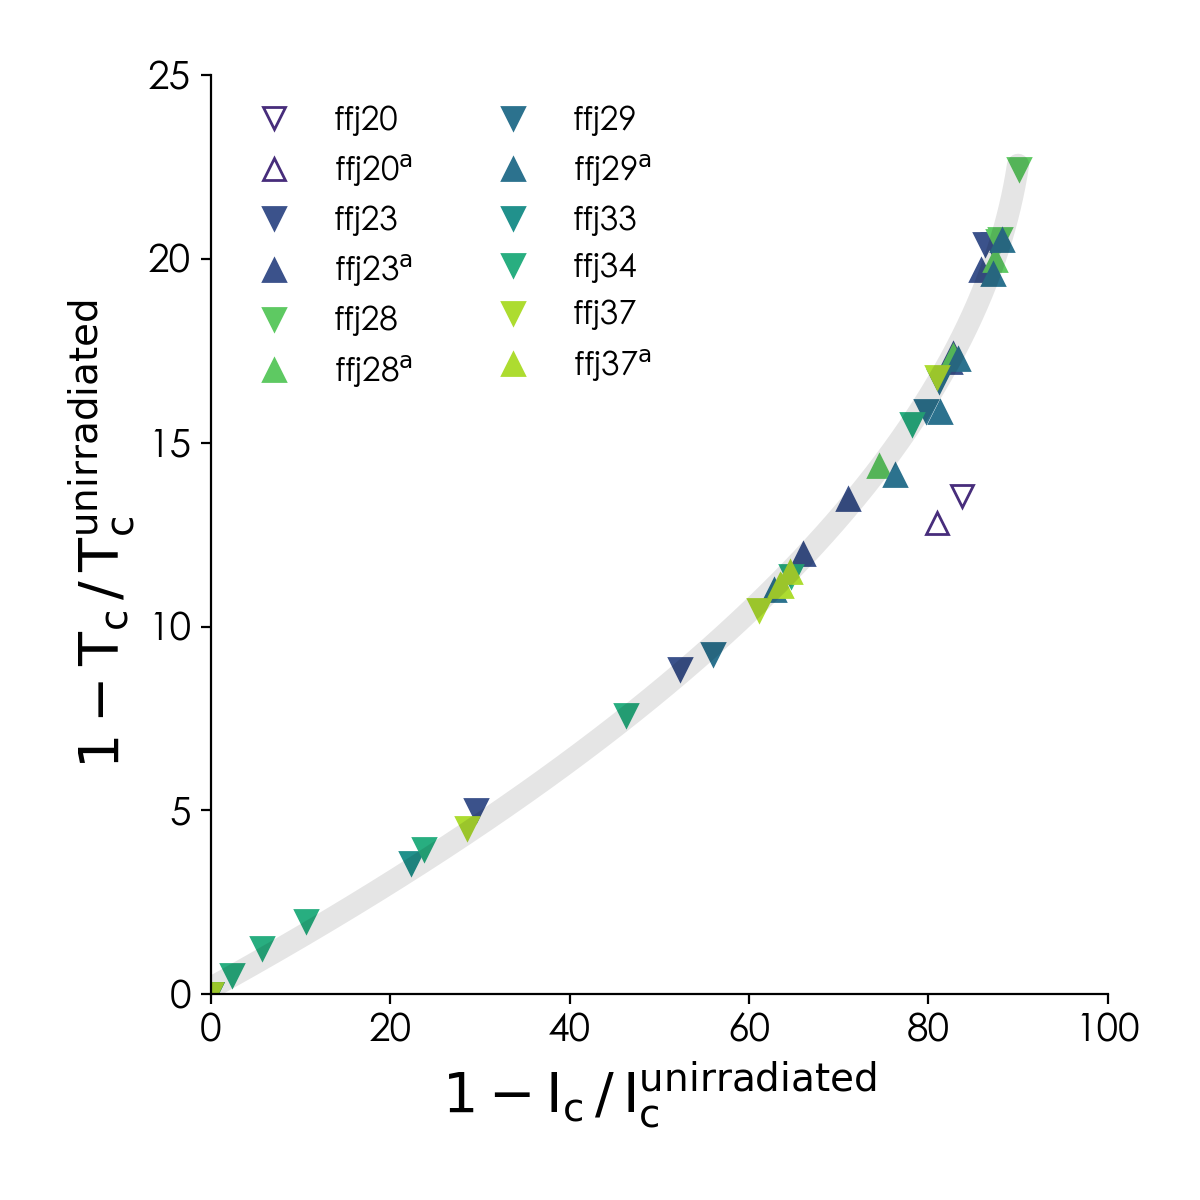

[ 0.69975365  0.75392883  0.13455914 -0.01259732]


In [161]:
fig, ax = plt.subplots(figsize=(6, 6))
percent = 100

ax.set_xlabel('$\mathrm{1 - I_c \, / \, I_c^{unirradiated}}$')
ax.set_ylabel('$\mathrm{1 - T_c \, / \, T_c^{unirradiated}}$')
ax.set_xlim(0, percent*1.0)
ax.set_ylim(0., .25*percent)

df = pd.read_excel(dfs.master, sheet_name='TcIc', usecols=[0, 1, 4, 6], names=['tapeid', 'anneal', 'tc', 'ic'], skiprows=1)

icnorm = []
tcnorm = []

for tapeid in [t for t in np.sort(df.tapeid.unique())]:
    data = df[df.tapeid == tapeid]
    x, y = data.ic/data.ic.max(), data.tc/data.tc.max()
    
    if tapeid != 'f20':
        for d in x.values:
            icnorm.append(d)
        for d in y.values:
            tcnorm.append(d)
        mec = mfc = dfs.colors_tapes[tapeid]
    else:
        mec, mfc = dfs.colors_tapes[tapeid], 'None'
        
    ax.plot(percent*(1-x[data.anneal == 1]), percent*(1-y[data.anneal == 1]), marker='v', markersize=8, linestyle='None', mfc=mfc, mec=mec, label=tapeid.replace('f', 'ffj'))
    if len(y[data.anneal > 1]) > 0:
        ax.plot(percent*(1-x[data.anneal > 1]), percent*(1-y[data.anneal > 1]), marker='^', markersize=8, linestyle='None', mfc=mfc, mec=mec, label=tapeid.replace('f', 'ffj')+'$\mathrm{^a}$')

fitfunction = bsp.getEmpiricalTcDegradation

popt, pcov = curve_fit(fitfunction, np.array(icnorm), np.array(tcnorm))
xsmooth = np.linspace(0.1, 1, 10000)
xsmooth = xsmooth[popt[2]*xsmooth >= np.abs(popt[3])]
ysmooth = fitfunction(xsmooth, *popt)
print(popt)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot((1-xsmooth)*percent, (1-ysmooth)*percent, linewidth=8, alpha=.1, color='k', solid_capstyle='round')
ax.legend(loc='upper left', ncols=2, frameon=False)
fig.tight_layout()

plt.savefig(dfs.outputDirectory+'figure11-correctionMethod-b.svg', format='svg', transparent=True)

## We do the same fit for ffj20

<IPython.core.display.Javascript object>


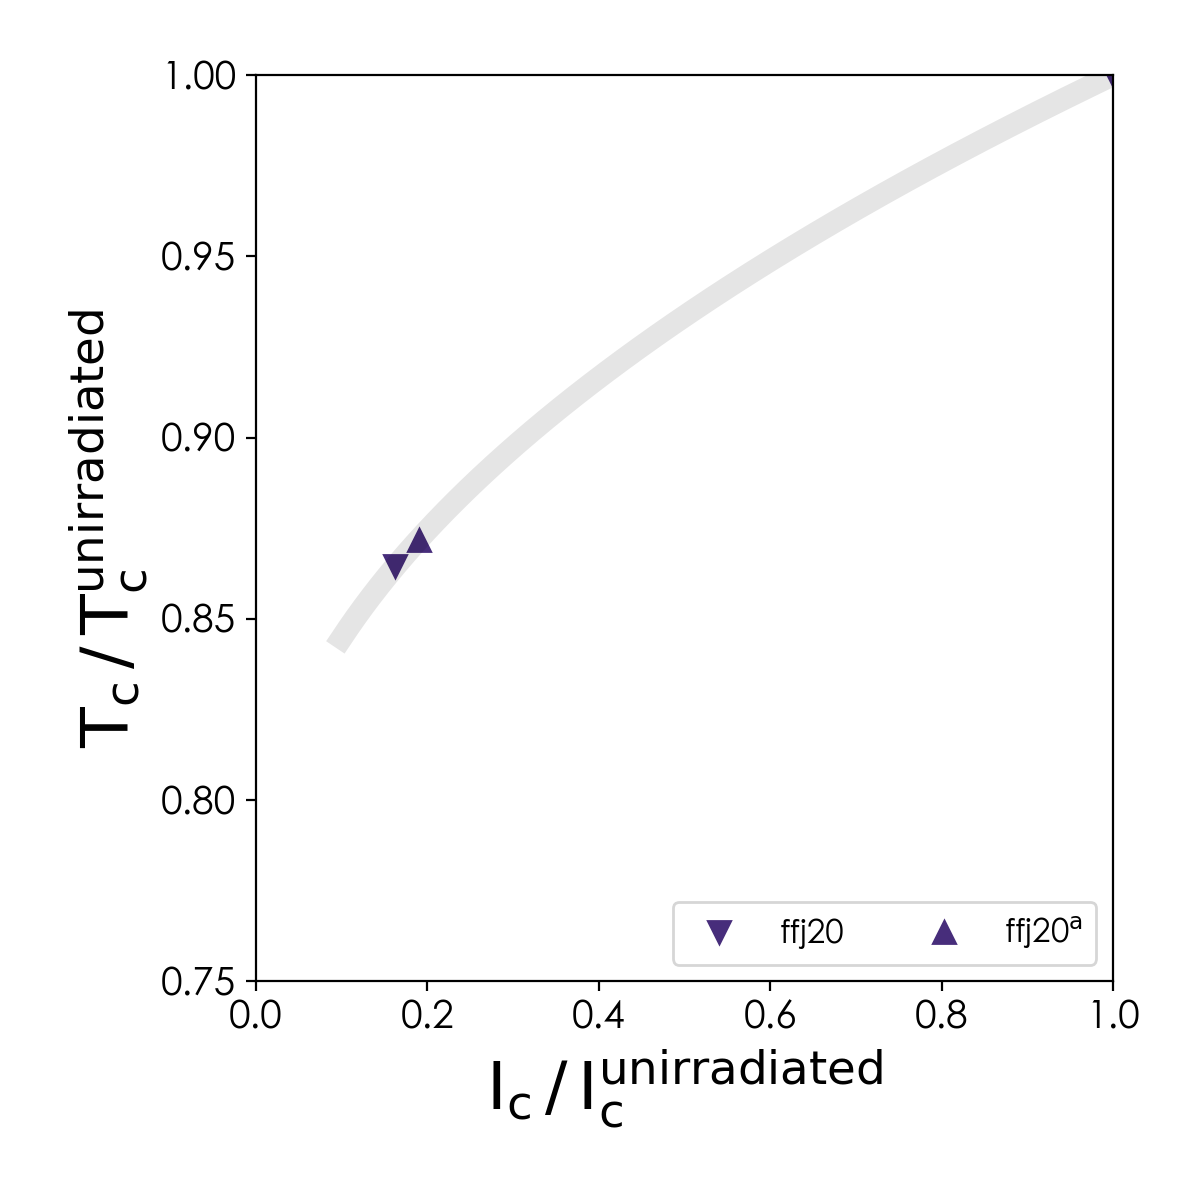

[0.35584097 0.77284068 0.40751745]


In [53]:
fig, ax = plt.subplots(figsize=(6, 6))
percent = 1

ax.set_xlabel('$\mathrm{I_c \, / \, I_c^{unirradiated}}$', fontsize=24)
ax.set_ylabel('$\mathrm{T_c \, / \, T_c^{unirradiated}}$', fontsize=24)
ax.set_xlim(0, percent*1.0)
ax.set_ylim(0.75, percent*1.)

df = pd.read_excel(dfs.master, sheet_name='TcIc', usecols=[0, 1, 4, 6], names=['tapeid', 'anneal', 'tc', 'ic'], skiprows=1)

icnorm = []
tcnorm = []

for tapeid in [t for t in np.sort(df.tapeid.unique()) if t == 'f20']:
    data = df[df.tapeid == tapeid]
    x, y = data.ic/data.ic.max(), data.tc/data.tc.max()
    
    for d in x.values:
        icnorm.append(d)
    for d in y.values:
        tcnorm.append(d)
    mec = mfc = dfs.colors_tapes[tapeid]
        
    ax.plot(percent*x[data.anneal == 1], percent*y[data.anneal == 1], marker='v', markersize=8, linestyle='None', mfc=mfc, mec=mec, label=tapeid.replace('f', 'ffj'))
    if len(y[data.anneal > 1]) > 0:
        ax.plot(percent*x[data.anneal > 1], percent*y[data.anneal > 1], marker='^', markersize=8, linestyle='None', mfc=mfc, mec=mec, label=tapeid.replace('f', 'ffj')+'$\mathrm{^a}$')

fitfunction = lambda x, a, b, c: bsp.getEmpiricalTcDegradation(x, a, b, c, 0)

popt, pcov = curve_fit(fitfunction, np.array(icnorm), np.array(tcnorm))
xsmooth = np.linspace(0.1, 1, 10000)
ysmooth = fitfunction(xsmooth, *popt)
print(popt)

ax.plot((xsmooth)*percent, (ysmooth)*percent, linewidth=8, alpha=.1, color='k')
ax.legend(loc='lower right', ncols=2)
fig.tight_layout()

## Figure11-a) decription

We show that Ic(T) is a monotonic function of Tc degradation. The curves are taken at regular intervals of Ic degradation for several samples (differentiated by markers).

<IPython.core.display.Javascript object>


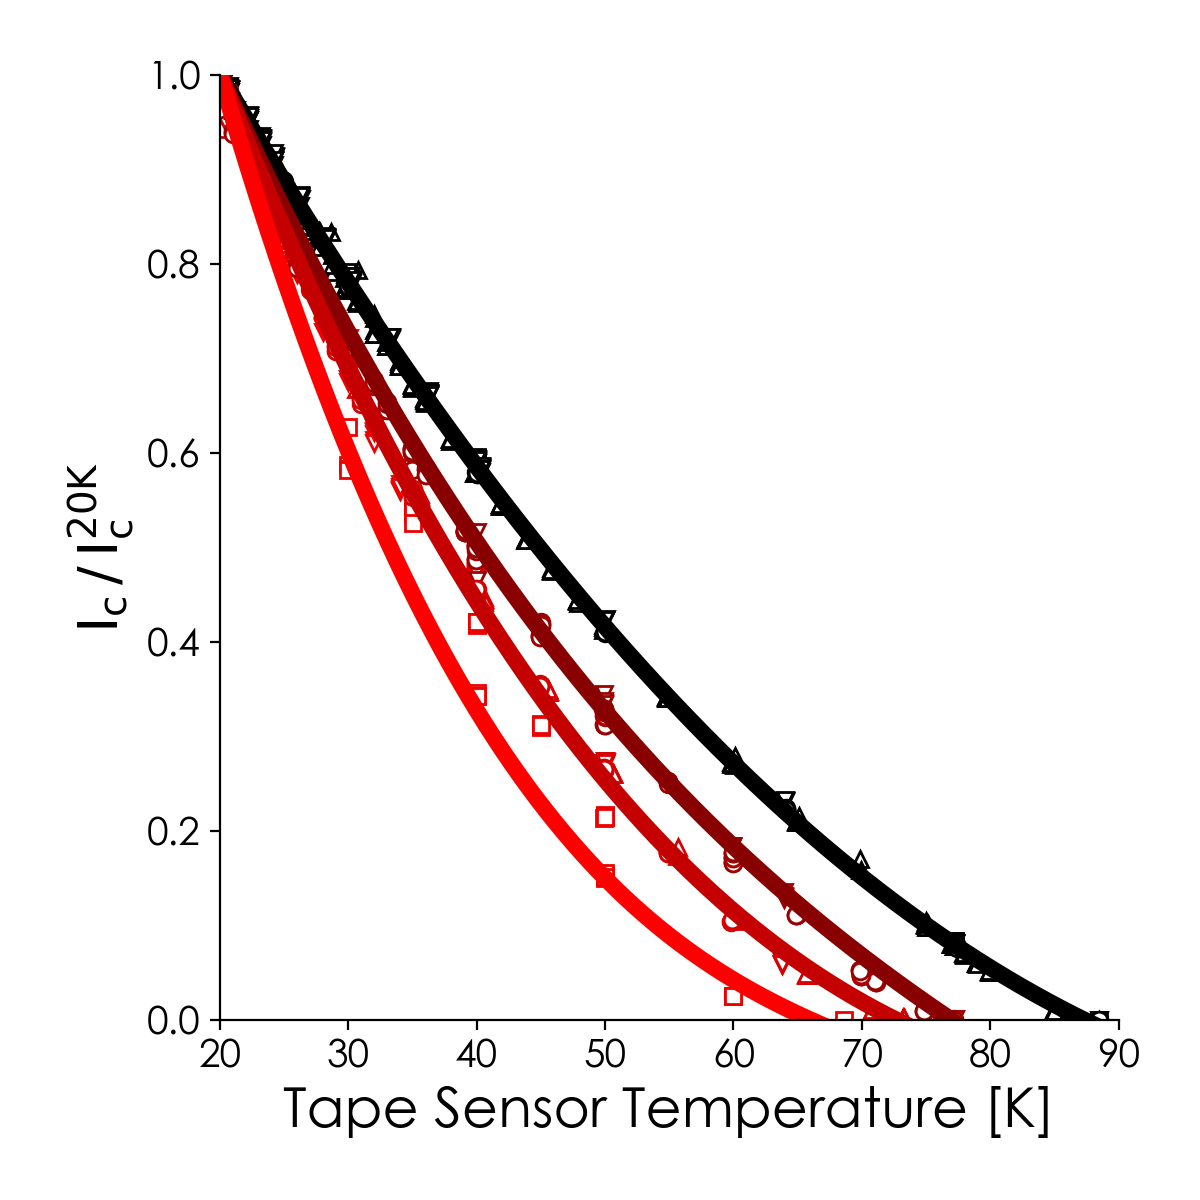

0.09249471677635596


In [153]:
fig, ax = plt.subplots(figsize=(6, 6))
fitfunction = ff.cubic2
path_top = '../data/IcT/IcT/'

pristineTemperature = np.array([])
damagedTemperature =  np.array([])
pristineIc = np.array([])
damagedIc = np.array([])
temperature50 = np.array([])
ic50 = np.array([])
temperature25 = np.array([])
ic25 = np.array([])

degradation = []
palette = sns.color_palette('blend:black,red', 14)

for tape, m in zip(['f20', 'f28', 'f29', 'f37'], ['^', 's', 'v', 'o']):
    path_tape = path_top+'{}/'.format(tape)
    
    for icT in np.sort([f for f in os.listdir(path_tape) if f != '.DS_Store']):
        if '77' not in icT:
            path = path_tape+'{}/'.format(icT)
            fpaths = [path+f for f in os.listdir(path) if f[:2] == 'Ic']
            _, _, ictdata, _ = hts.getIcT(fpaths, vb=False)
            ics, temperatures = ictdata.ic.values.tolist(), ictdata.temperature.values.tolist()
            
            ic20k = np.max(ics)
            if icT == '0e20pm2':
                ic020k = ic20k
                ics.append(0.001)
                temperatures.append(88.5)
                
            if icT == 'afterBeamOn':
                ics.append(0.001)
                temperatures.append(68.62868916)
                print(ic20k/ic020k)
                
            x, y = np.array(temperatures), np.array(ics)/ic20k
            
            c = palette[int(np.floor(14*(1-ic20k/ic020k)))]
            if (.5 < ic20k/ic020k) & (ic20k/ic020k <= 1):
                #c = palette[0]
                pristineTemperature = np.append(pristineTemperature, temperatures)
                pristineIc = np.append(pristineIc, np.array(ics)/ic20k)
                
            elif (.25 < ic20k/ic020k) & (ic20k/ic020k <= .5):
                #c = palette[4]
                if tape != 'f37':
                    temperature50 = np.append(temperature50, temperatures)
                    ic50 = np.append(ic50, np.array(ics)/ic20k)
                
            elif (.1 < ic20k/ic020k) & (ic20k/ic020k <= .25):
                #c = palette[6]
                temperature25 = np.append(temperature25, temperatures)
                ic25 = np.append(ic25, np.array(ics)/ic20k)

            else:
                #c = palette[0]
                damagedTemperature = np.append(damagedTemperature, temperatures)
                damagedIc = np.append(damagedIc, np.array(ics)/ic20k)
                     
            ax.plot(x, y, linestyle='None', marker=m, markersize=6, mec=c, mfc='white')

# Plot the pristine and heavily degraded datasets, and fit to a third-order polynomial
temperatures = [pristineTemperature, temperature50, temperature25, damagedTemperature]
ics = [pristineIc, ic50, ic25, damagedIc]
colors = [palette[0], palette[int(14*.5)], palette[int(14*.75)], palette[-1]]
for x, y, c, l in zip(temperatures, ics, colors, ['0% $\mathrm{I_c}$ degradation', '50% $\mathrm{I_c}$ degradation', '75% $\mathrm{I_c}$ degradation', '90% $\mathrm{I_c}$ degradation']):
    xsmooth = np.linspace(0, np.max(x), 10000)
    popt, pcov = curve_fit(fitfunction, x, y)
    ax.plot(xsmooth, fitfunction(xsmooth, *popt), linestyle='-', linewidth=6, alpha=1, color=c, label=l, solid_capstyle='round')

ax.set_ylim(0, 1)
ax.set_xlim(20, 90)
ax.set_xlabel('Tape Sensor Temperature [K]')
ax.set_ylabel('$\mathrm{I_c \, / \, I_c^{20K}}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.savefig(dfs.outputDirectory+'figure11-correctionMethod-a.svg', format='svg', transparent=True)

## Description of figure11-c

Here we demonstrate the interpolation process for the Ic(T) curve.

<IPython.core.display.Javascript object>


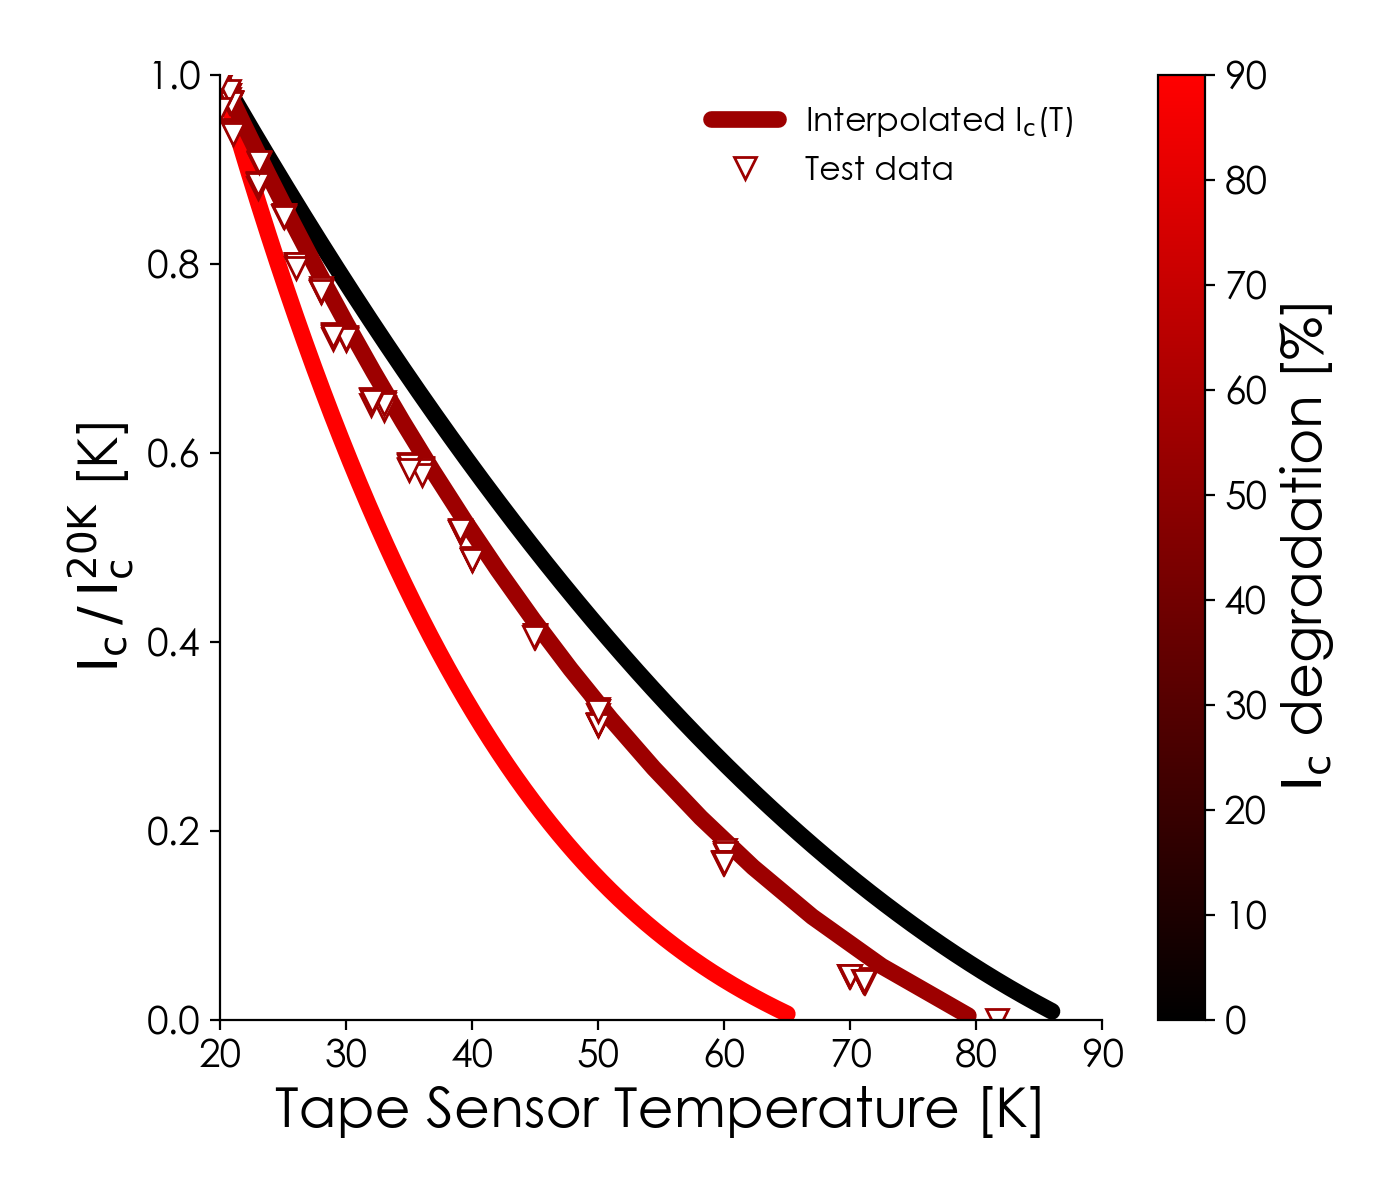

0% $\mathrm{I_c}$ degradation
Optimized parameters for 0% $\mathrm{I_c}$ degradation [-6.25265623e-08  1.29529294e-04 -2.32821930e-02]


90% $\mathrm{I_c}$ degradation
Optimized parameters for 90% $\mathrm{I_c}$ degradation [-4.50561071e-06  7.54452215e-04 -4.68947575e-02]




In [163]:
fig, ax = plt.subplots(figsize=(7, 6))
fitfunction = ff.cubic2
xsmooth = np.linspace(20, 90, 10000)

palette = sns.color_palette('blend:black,red', 14)

# Plot the pristine and heavily degraded datasets, and fit to a third-order polynomial
for l, x, y, c, l, xlim in zip(['pristine', 'degraded'], [pristineTemperature, damagedTemperature], [pristineIc, damagedIc], [palette[0], palette[-1]], ['0% $\mathrm{I_c}$ degradation', '90% $\mathrm{I_c}$ degradation'], [86, 65]):
    popt, pcov = curve_fit(fitfunction, x, y)
    xsmooth = np.linspace(20, xlim, 1000)
    ax.plot(xsmooth, fitfunction(xsmooth, *popt), linestyle='-', linewidth=6, alpha=1, color=c, solid_capstyle='round')
    print(l)
    print('Optimized parameters for', l, popt)
    print('\n')
 
# Using the polynomials: try to predict another curve
tape, ic0, interpolation = 'f37', 34.88, '150keV'
path = '../data/IcT/IcT/{}/{}/'.format(tape, interpolation)
_, _, ictdata, _ = hts.getIcT([path+f for f in os.listdir(path) if (f != '.DS_Store')], vb=False)
ic, t = ictdata.ic.values.tolist(), ictdata.temperature.values.tolist()
icoff = np.max(ic)
yprediction = np.linspace(0.005, 1, 20)
suppression, icon, xprediction = bsp.v_getCorrectedSuppression(yprediction*icoff, icoff, ic0)
ax.plot(xprediction, yprediction, color=palette[int(14*(1-icoff/ic0))], linestyle='-', linewidth=6, alpha=1, label='Interpolated I$\mathrm{_c}$(T)', solid_capstyle='round')
ax.plot(t, ic/icoff, marker='v', mec=palette[int(14*(1-icoff/ic0))], mfc='white', linestyle='None', label='Test data', solid_capstyle='round')

mycolormap = sns.color_palette('blend:black,red', as_cmap=True)
cbar = fig.colorbar(cm.ScalarMappable(norm=Normalize(0, 90), cmap=colormap), ax=ax)

cbar.set_label('$\mathrm{I_c}$ degradation [%]')
ax.set_ylim(0, 1)
ax.set_xlim(20, 90)
ax.set_xlabel('Tape Sensor Temperature [K]')
ax.set_ylabel('$\mathrm{I_c\, /\, I_c^{20K}}$ [K]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper right', frameon=False)
fig.tight_layout()

plt.savefig(dfs.outputDirectory+'figure11-correctionMethod-c.svg', format='svg', transparent=True)

## Supplementary figure description

This figure shows that Ic suppression increases linearly with degradation. In this experiment, samples ffj28 is irradiated at 20 K with a 30 nA 1200 keV beam. The cold mass temperature is fixed at 19 K for the duration of the experiment.

<IPython.core.display.Javascript object>


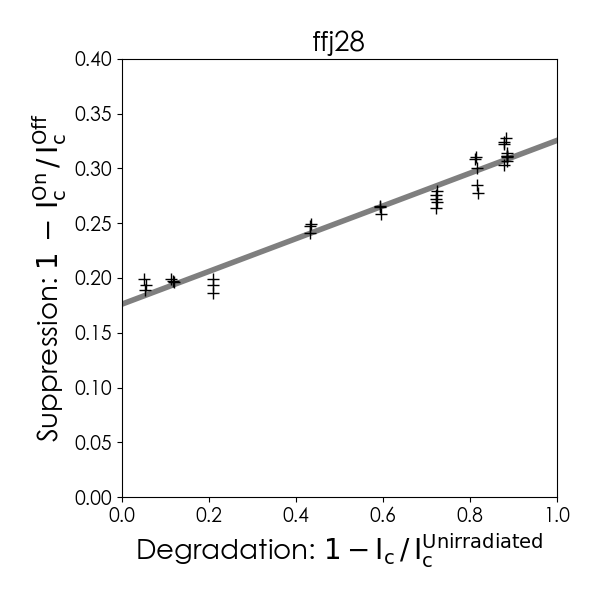

In [30]:
tapeid, names = 'f28', ['tapeid', 'power', 'degradation', 'suppression']
df = pd.read_excel(dfs.master, sheet_name='data', usecols=[0, 13, 53, 55], names=names, skiprows=1)
data = df[(df.tapeid == tapeid) & (34 <= df.power) & (df.power <= 38)]

fig, ax = plt.subplots()

x, y = 1-data.degradation, data.suppression
popt, pcov = curve_fit(ff.linear, x, y)
xsmooth = np.linspace(0, 1, 1000)
ysmooth = ff.linear(xsmooth, *popt)

ax.plot(xsmooth, ysmooth, linewidth=4, alpha=.5, color='k')
ax.plot(x, y, marker='+', linestyle='None', color='k', alpha=1)

ax.set_xlim(0, 1.)
ax.set_ylim(0, .4)
ax.set_title(tapeid.replace('f', 'ffj'), color='k')
ax.set_xlabel('Degradation: $\mathrm{1 - I_c\, /\, I_c^{Unirradiated}}$')
ax.set_ylabel('Suppression: $\mathrm{1\, -\, I_c^{On}\, /\, I_c^{Off}}$')
fig.tight_layout()